# I.Tải Dữ Liệu


In [4]:
import os
import tarfile # Sử lý file trong trường hợp này là giải nén.
import urllib # requets có thể dụng model requets

DOWLOAD_ROOT = "https://raw.githubusercontent.com/mlbvn/handson-ml2-vn/main/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWLOAD_ROOT +"datasets/housing/housing.tgz"


def fetch_housing_data(housing_url = HOUSING_URL, housing_path = HOUSING_PATH):
  os.makedirs(housing_path, exist_ok= True) # Kiểm tra xe các đường dẩn đả tạo ra chưa!
  tgz_path = os.path.join(housing_path, "housing.tgz") # Đường dẩn đến file
  urllib.request.urlretrieve(housing_url, tgz_path) # requests và ghi vào file tgz_path
  housing_tgz = tarfile.open(tgz_path) # Mở file 
  housing_tgz.extractall(path = housing_path) # giải nén file
  housing_tgz.close() # đống file!

fetch_housing_data(housing_url = HOUSING_URL, housing_path = HOUSING_PATH)

# 2.LOAD DỮ LIỆU.

In [9]:
import pandas as pd

def load_housing_data(housing_path = HOUSING_PATH):
  """ 
  2 tham số:
   housing_path là đường dẩn cha.
   "housing.csv": name file
  """
  csv_path = os.path.join(housing_path, "housing.csv") # Đường dấn đến file
  read_file = pd.read_csv(csv_path)
  return read_file

housing = load_housing_data()


# Xem 5 dữ liệu đầu tiên trong data.
# Mặt định là 5.
housing.head()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


## `Nhìn` qua dữ liệu trên ta thấy được có `10 ` thuộc tính và để xem mô tả về dữ liệu thì chung ta có thể dùng hàm `info`

In [10]:
"Housing Shape: {}".format(housing.shape)

'Housing Shape: (20640, 10)'

In [11]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


### Nhìn vào dữ liệu thì ta thấy có `20640` entries và có index bầu đầu từ `0` đến `20639`
và ocean_proximity là có dữ liệu là object

### Dữ liệu ở  total_bedrooms bị thiếu dữ liệu =)) cần phải sữ lý dữ liệu (`mising data`)

## Chúng ta có thể xem Tổng quan về 1 trường dữ liệu bằng hàm `value_counts()`

In [12]:
housing["ocean_proximity"].value_counts()
# Tổng các dữ liệu là :20640 

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

### `Thuộc tính tổng quan của dữ liệu`

In [14]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


# Biểu đồ Tần xuất (Tỷ lệ xuất hiện của dữ mổi trường dữ liệu).

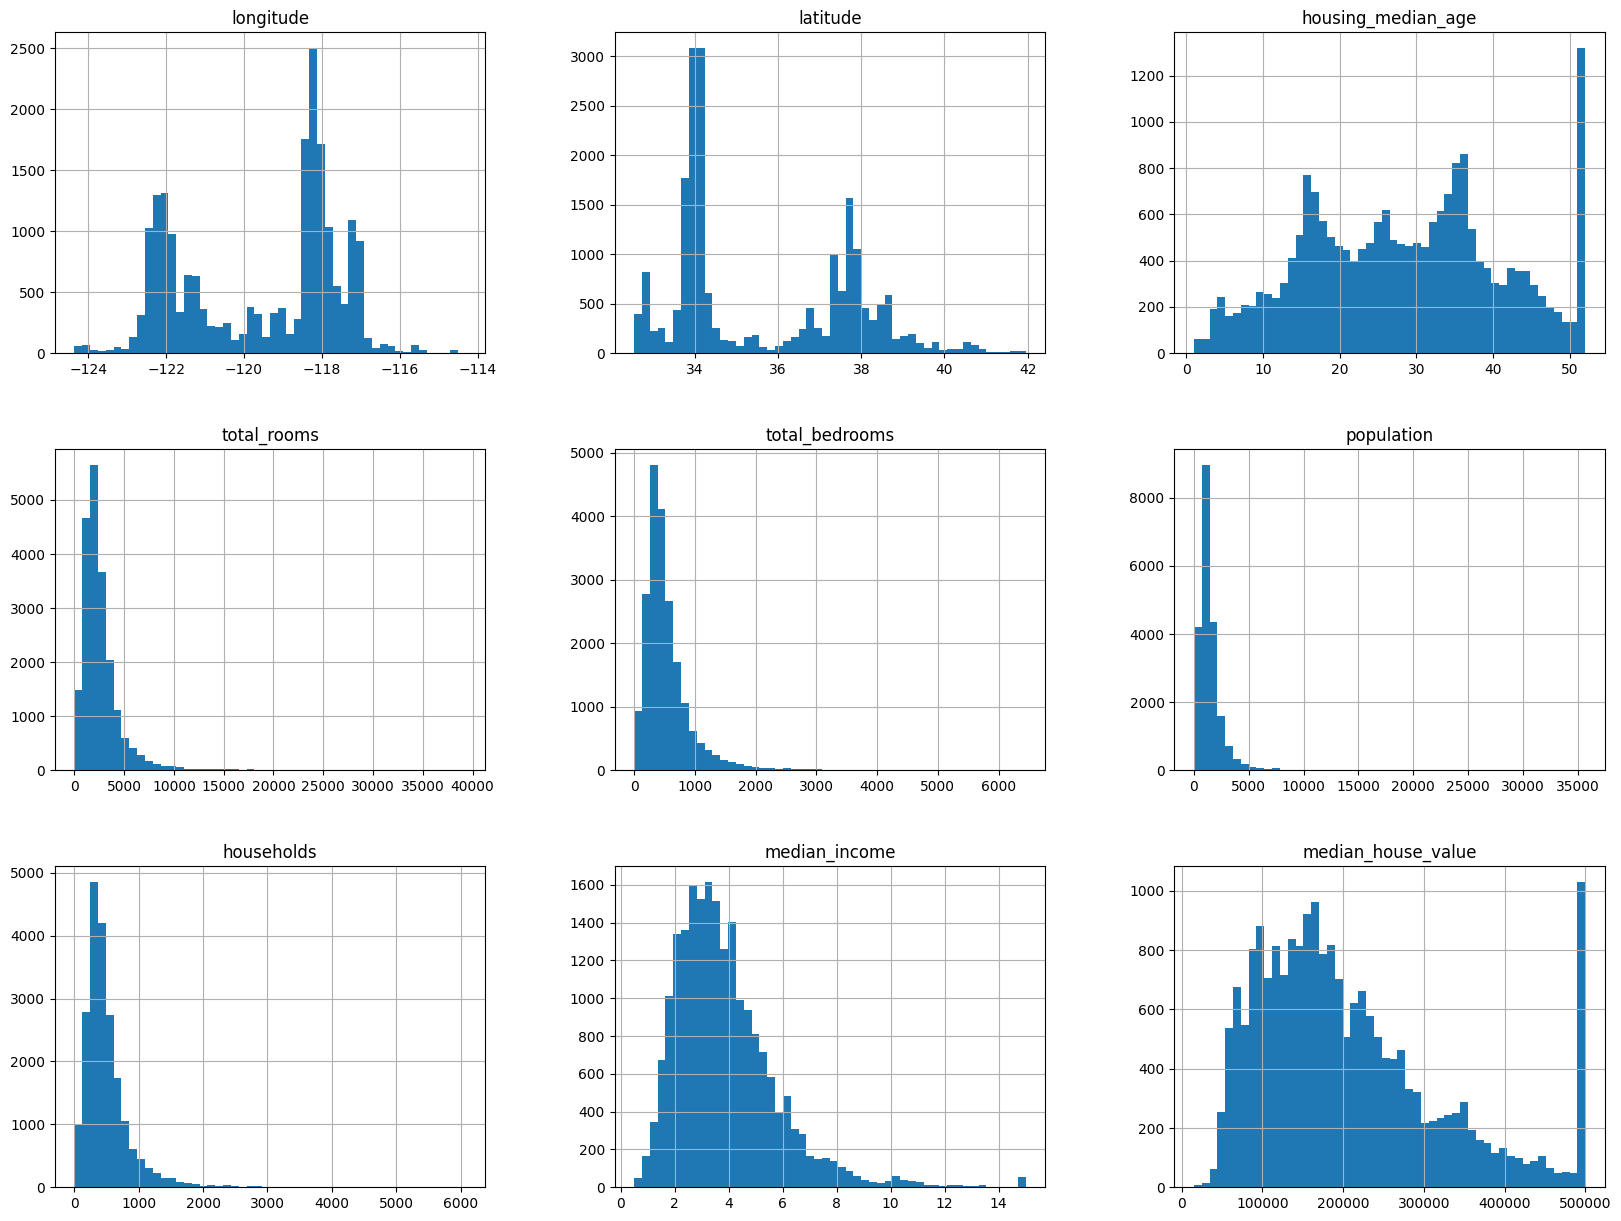

In [15]:
# Hàm này gọi backend của riêng nó để vẽ biểu đồ đồ họa.
%matplotlib inline
import matplotlib.pyplot as plt


# Thằng hist Có đồ họa nào sữ dụn đồ họa ấy.
housing.hist(bins= 50, figsize=(20,15))
plt.show()

### chia data thành 2  tập Dữ liệu `train_set `và `test_set`


In [ ]:
# median_income = Thu nhập trinh bình

## Tạo ra 1 trường dữ liệu để quan sát mức thu nhập của mổi gia đình.
`bins=[0. ,1.5 ,3. ,4.5 , 6. , np.inf]`


`labels = [1,2,3,4,5]`



<Axes: >

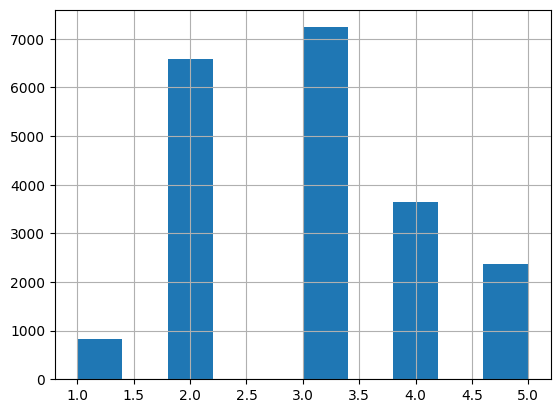

In [16]:
housing["income_cat"] = pd.cut(housing["median_income"],
                               bins=[0. ,1.5 ,3. ,4.5 , 6. , np.inf],
                               labels = [1,2,3,4,5])
housing["income_cat"].hist()

## Lấy mẫu ngẫu nhiên các dữ liệu


In [17]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing["income_cat"]):
  strat_train_set = housing.loc[train_index]  
  strat_test_set = housing.loc[test_index]

  

In [19]:
strat_test_set["income_cat"].value_counts()/len(strat_test_set)

3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: income_cat, dtype: float64

### tu do cothe thay lay mau tu nhien va lay mau trafic la nhu nhao  


# Khám phá dữ liệu  để hiểu dữ liệu.

2 trường longtude và latitude là 2 kinh độ và vĩ độ tương tự như 2 trục X và Trục y


<Axes: xlabel='longitude', ylabel='latitude'>

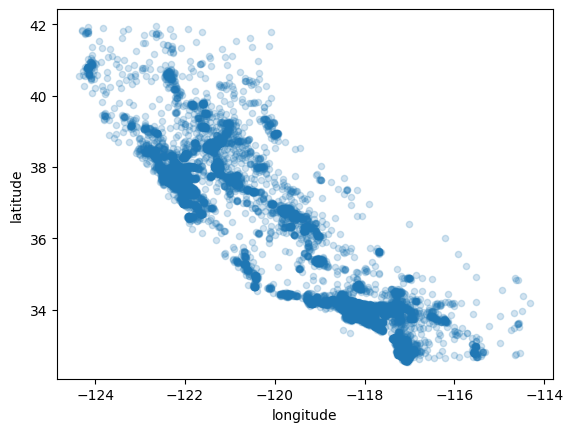

In [22]:
#copy du lieu de khong bi loi
housing = strat_train_set.copy()

# Trực Quan hóa dữ liệu lên biểu đồ.
housing.plot(kind = "scatter", x ="longitude", y ="latitude", alpha =0.2 )

In [21]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 12655 to 19773
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   longitude           16512 non-null  float64 
 1   latitude            16512 non-null  float64 
 2   housing_median_age  16512 non-null  float64 
 3   total_rooms         16512 non-null  float64 
 4   total_bedrooms      16354 non-null  float64 
 5   population          16512 non-null  float64 
 6   households          16512 non-null  float64 
 7   median_income       16512 non-null  float64 
 8   median_house_value  16512 non-null  float64 
 9   ocean_proximity     16512 non-null  object  
 10  income_cat          16512 non-null  category
dtypes: category(1), float64(9), object(1)
memory usage: 1.4+ MB


# Tìm hệ số tương quan

> Hệ số tương quan cho thấy mức độ quan hệ của dữ liệu ví dụ:
>> Phương trình đường thẳng : thì múc độ tương quan là a và b vs pt y = ax+B.


dung corr() để xem mức độ tương quan của dư liệu



In [26]:
# corr()

corr_matric = housing.corr()
corr_matric["median_house_value"].sort_values(ascending = False)

<ipython-input-26-537396a34ddc>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matric = housing.corr()


median_house_value    1.000000
median_income         0.687151
total_rooms           0.135140
housing_median_age    0.114146
households            0.064590
total_bedrooms        0.047781
population           -0.026882
longitude            -0.047466
latitude             -0.142673
Name: median_house_value, dtype: float64

# 5. Tìm sự tương quan bằng cách dữ dụng pandas và vẽ đồ thị

array([[<Axes: xlabel='median_house_value', ylabel='median_house_value'>,
        <Axes: xlabel='median_income', ylabel='median_house_value'>,
        <Axes: xlabel='total_rooms', ylabel='median_house_value'>,
        <Axes: xlabel='housing_median_age', ylabel='median_house_value'>],
       [<Axes: xlabel='median_house_value', ylabel='median_income'>,
        <Axes: xlabel='median_income', ylabel='median_income'>,
        <Axes: xlabel='total_rooms', ylabel='median_income'>,
        <Axes: xlabel='housing_median_age', ylabel='median_income'>],
       [<Axes: xlabel='median_house_value', ylabel='total_rooms'>,
        <Axes: xlabel='median_income', ylabel='total_rooms'>,
        <Axes: xlabel='total_rooms', ylabel='total_rooms'>,
        <Axes: xlabel='housing_median_age', ylabel='total_rooms'>],
       [<Axes: xlabel='median_house_value', ylabel='housing_median_age'>,
        <Axes: xlabel='median_income', ylabel='housing_median_age'>,
        <Axes: xlabel='total_rooms', ylabel='housi

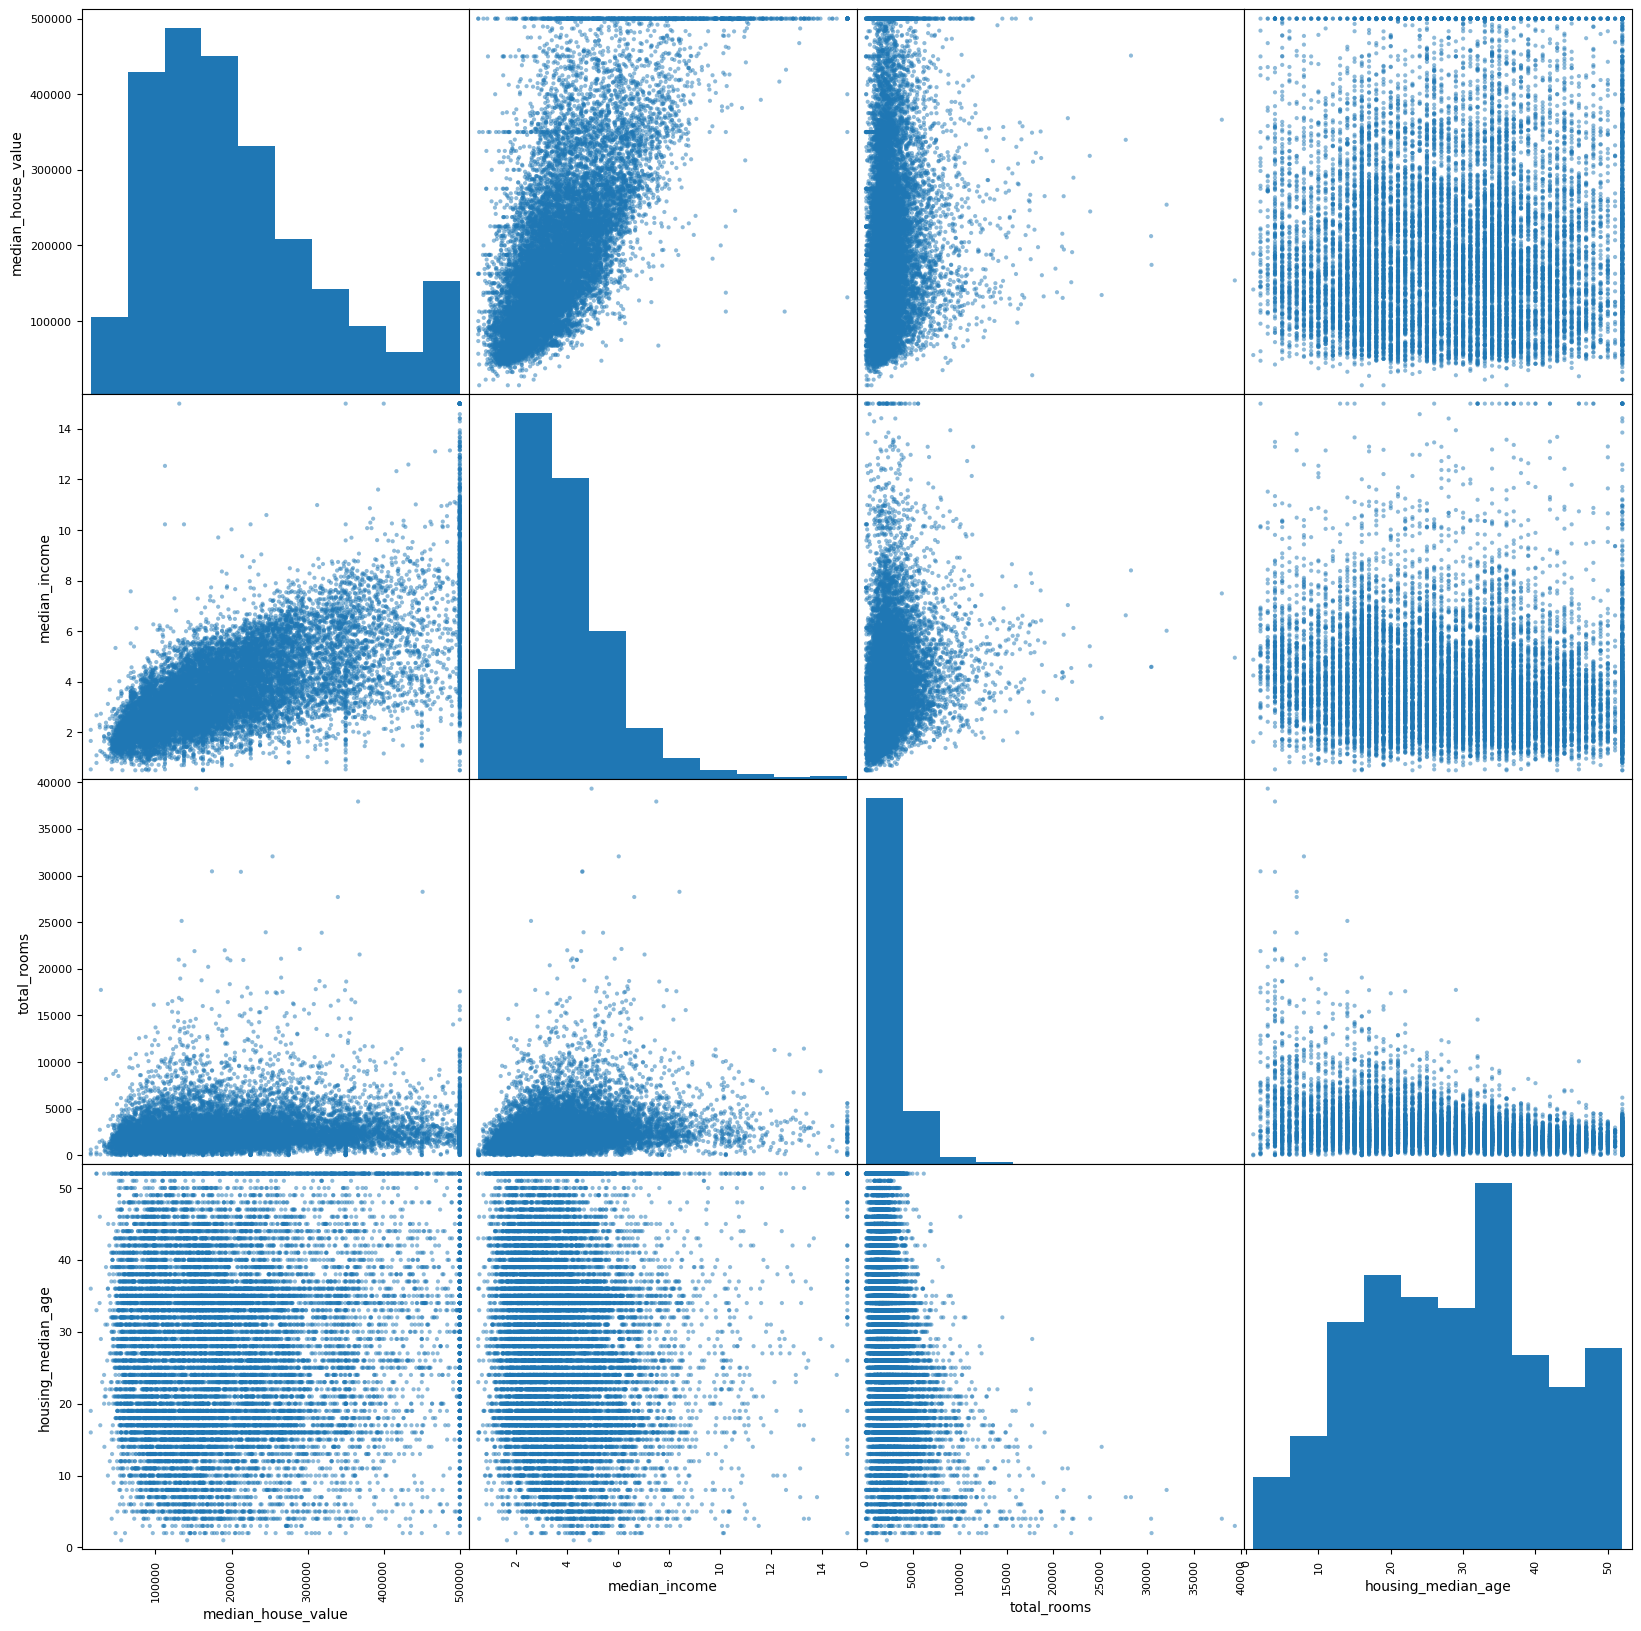

In [27]:
from pandas.plotting import  scatter_matrix

attributes = ["median_house_value", "median_income", "total_rooms",
              "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(20,20))